# FP 4

# Import Pustaka

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.head() # Check dataset baris teratas

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.tail() # # Check dataset baris terbawah

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
df.shape # Check jumlah baris dan kolom

(8950, 18)

**Baris 8950**

**Kolom 18**

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Cleaning

In [8]:
df.describe().T.reset_index().rename(
    columns={'index': 'Attribute'})

,Attribute,count,mean,std,min,25%,50%,75%,max
0,BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
1,BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
2,PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
3,ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
4,INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
5,CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
6,PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
7,ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
8,PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
9,CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


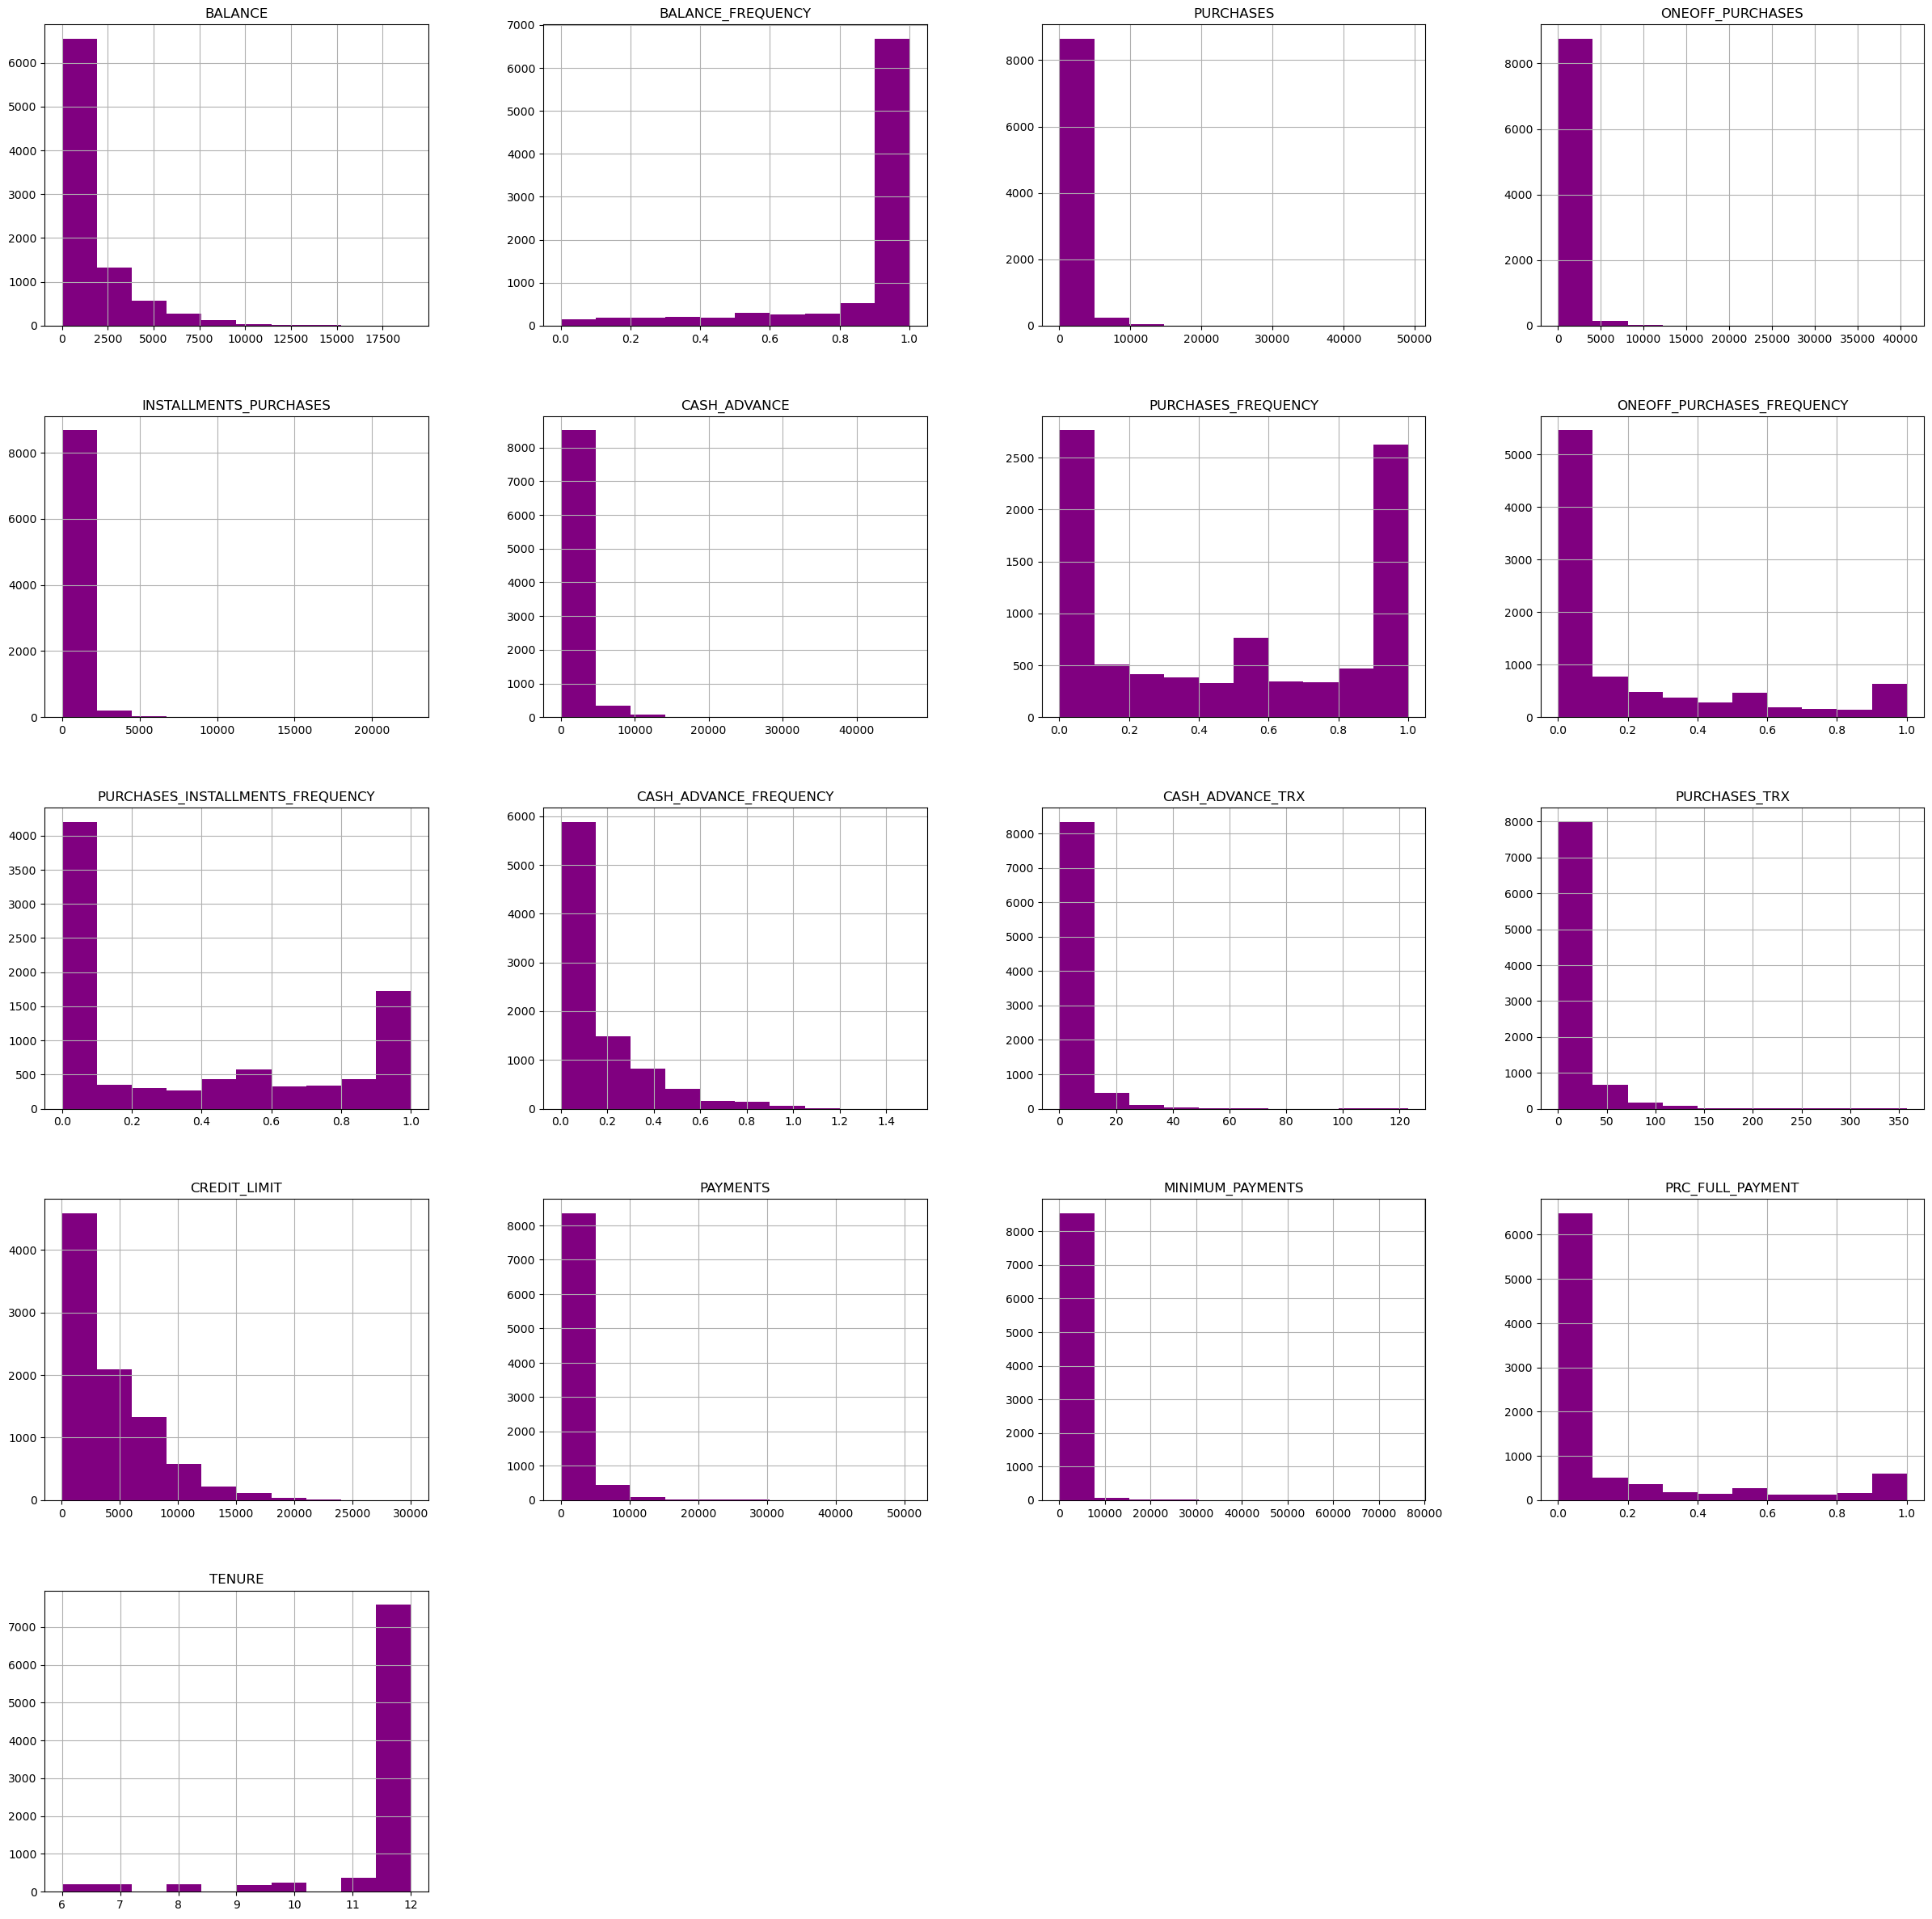

In [9]:
# Pesebaran data

df.hist(figsize = (30,30),color="purple")
plt.show()

Returns the lists of categorical columns (cat_cols), categorical but cardinal columns (cat_but_car), and numeric columns (num_cols).

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, cat_but_car, num_cols

In [11]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,CUST_ID,object,8950,0
1,BALANCE,float64,8871,0
2,BALANCE_FREQUENCY,float64,43,0
3,PURCHASES,float64,6203,0
4,ONEOFF_PURCHASES,float64,4014,0
5,INSTALLMENTS_PURCHASES,float64,4452,0
6,CASH_ADVANCE,float64,4323,0
7,PURCHASES_FREQUENCY,float64,47,0
8,ONEOFF_PURCHASES_FREQUENCY,float64,47,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0


**Drop Null**

In [12]:
df = df.dropna()

In [13]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 8636
Variables: 18
cat_cols: 1
num_cols: 16
cat_but_car: 1
num_but_cat: 1


**Tangani Outlier**

In [14]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [15]:
check_outlier(df[num_cols])

Outlier pada tiap atribut:
BALANCE                              666
BALANCE_FREQUENCY                   1511
PURCHASES                            768
ONEOFF_PURCHASES                     961
INSTALLMENTS_PURCHASES               811
CASH_ADVANCE                         977
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           749
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               341
CASH_ADVANCE_TRX                     794
PURCHASES_TRX                        716
CREDIT_LIMIT                         243
PAYMENTS                             785
MINIMUM_PAYMENTS                     841
PRC_FULL_PAYMENT                    1343
dtype: int64


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
def outlier_thresholds(dataframe, variable, low_quantile=0.15, up_quantile=0.85):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
        
for col in num_cols:
      print(col, check_outlier(df, col))

BALANCE True
BALANCE_FREQUENCY True
PURCHASES True
ONEOFF_PURCHASES True
INSTALLMENTS_PURCHASES True
CASH_ADVANCE True
PURCHASES_FREQUENCY False
ONEOFF_PURCHASES_FREQUENCY False
PURCHASES_INSTALLMENTS_FREQUENCY False
CASH_ADVANCE_FREQUENCY True
CASH_ADVANCE_TRX True
PURCHASES_TRX True
CREDIT_LIMIT True
PAYMENTS True
MINIMUM_PAYMENTS True
PRC_FULL_PAYMENT False


True menandakan terdapat outlier

In [17]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df,col)

In [18]:
df= df.drop(columns=["CUST_ID"],axis=1)

**Coorelation Matrix**

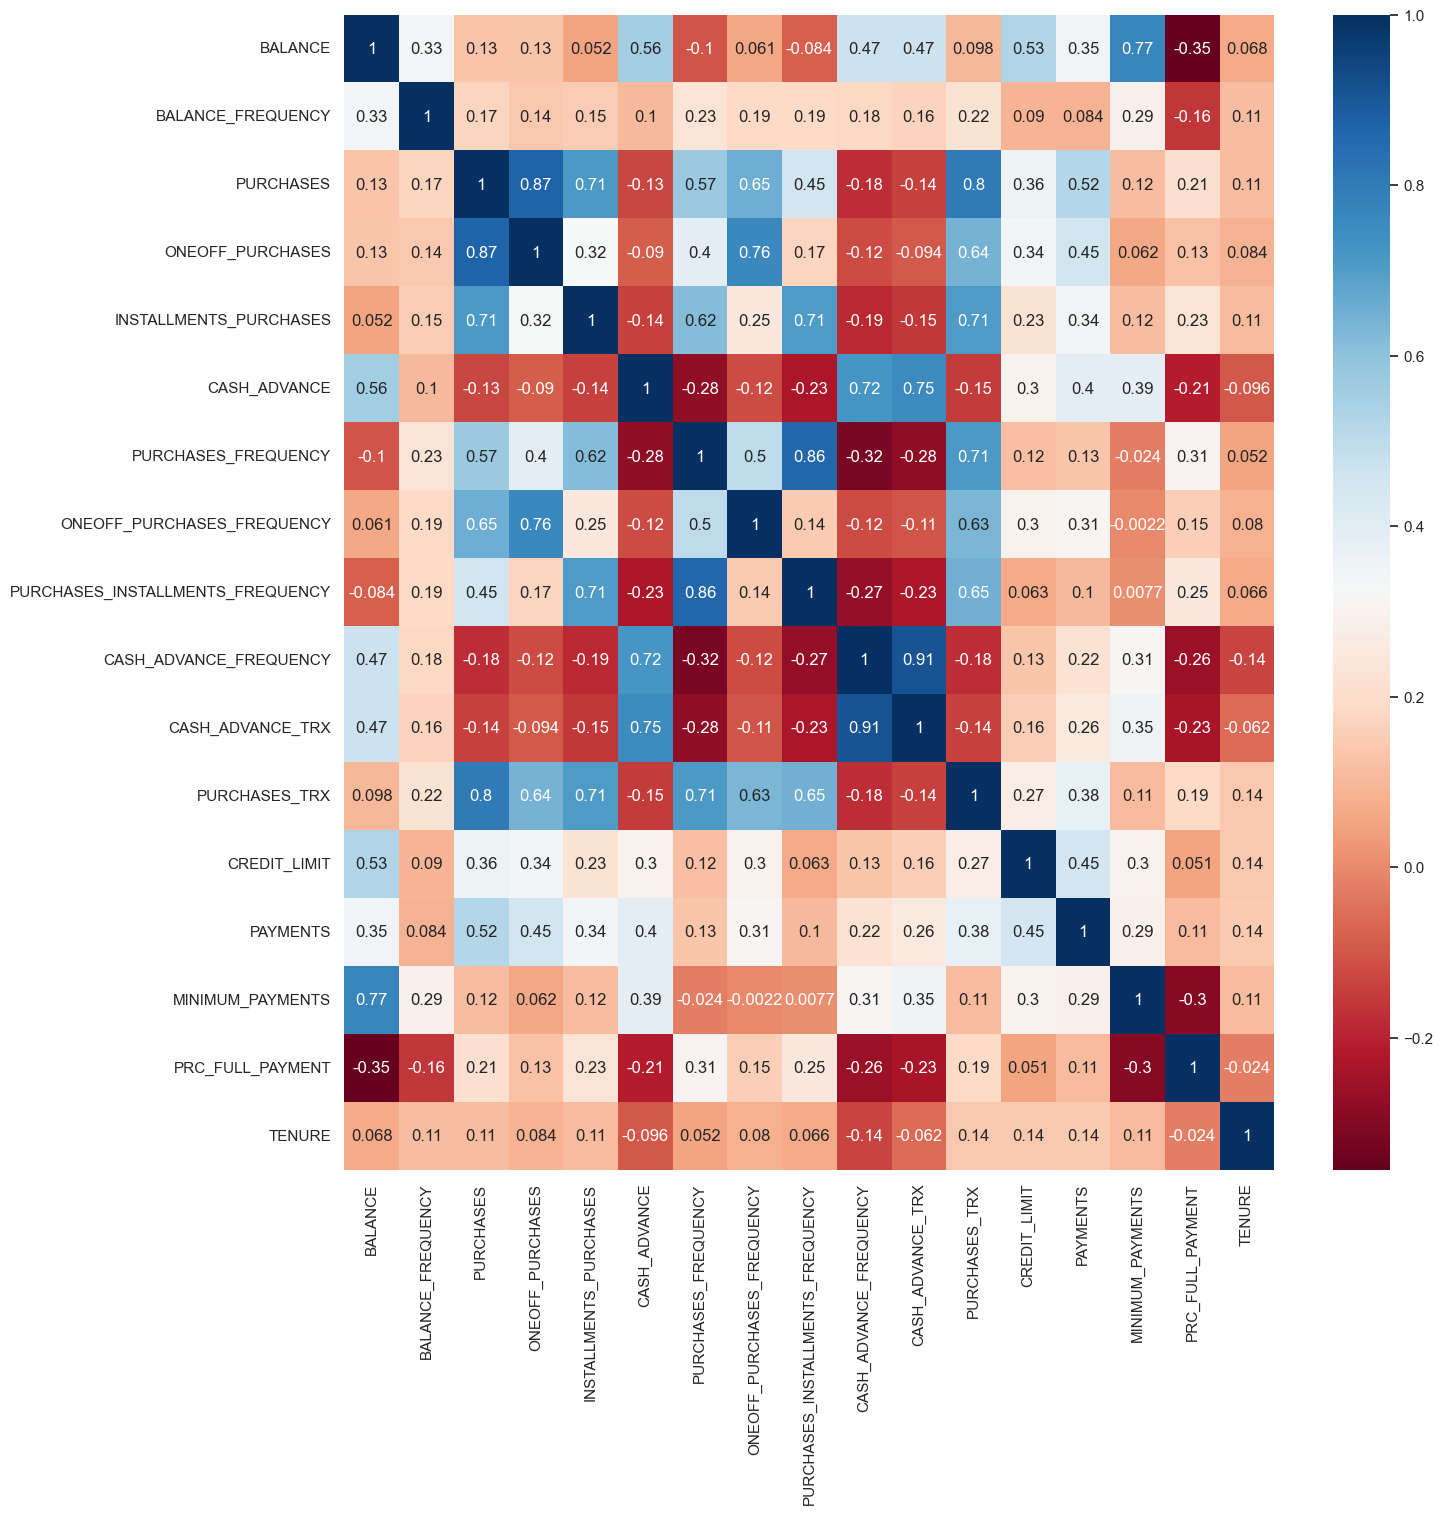

['ONEOFF_PURCHASES',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX']

In [19]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.80):
    numeric_dataframe = dataframe.select_dtypes(include=['number'])
    corr = numeric_dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu",annot=True)
        plt.show()
    return drop_list
high_correlated_cols(df, plot=True)

**Transformasi Data**

In [20]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 

In [21]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [22]:
scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.795663,-0.412785,-0.643632,-0.596421,-0.480997,-0.586816,-0.820769,-0.686280,-0.717179,-0.692063,-0.621277,-0.656381,-0.973829,-0.785653,-0.669048,-0.537727,0.355181
1,0.863385,0.052464,-0.722626,-0.596421,-0.655376,3.193887,-1.236139,-0.686280,-0.926522,0.575870,0.239227,-0.770522,0.690796,1.457419,0.538595,0.212380,0.355181
2,0.492216,0.517714,-0.082419,0.395938,-0.655376,-0.586816,1.256077,2.646651,-0.926522,-0.692063,-0.621277,-0.085672,0.829515,-0.544015,-0.037574,-0.537727,0.355181
3,-0.388026,0.517714,-0.709378,-0.575885,-0.655376,-0.586816,-1.028455,-0.408536,-0.926522,-0.692063,-0.621277,-0.713451,-0.918341,-0.511663,-0.532750,-0.537727,0.355181
4,0.132591,0.517714,0.381368,-0.596421,1.781687,-0.586816,0.425339,-0.686280,0.538882,-0.692063,-0.621277,-0.313956,-0.751879,-0.096697,2.266766,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.814045,-2.041161,-0.705320,-0.569596,-0.655376,-0.586816,-0.820769,-0.130790,-0.926522,-0.692063,-0.621277,-0.713451,-1.112547,-0.867963,-0.793376,-0.537727,-4.221800
8632,-0.802174,0.517714,-0.481570,-0.596421,-0.123246,-0.586816,1.256077,-0.686280,1.166912,-0.692063,-0.621277,-0.428097,-0.973829,-0.714476,-0.786369,1.150015,-4.221800
8633,-0.804848,-0.335246,-0.603059,-0.596421,-0.391432,-0.586816,0.840707,-0.686280,0.748227,-0.692063,-0.621277,-0.485168,-0.973829,-0.854954,-0.742958,0.306144,-4.221800
8634,-0.810064,-0.335246,-0.722626,-0.596421,-0.655376,-0.562117,-1.236139,-0.686280,-0.926522,0.153227,-0.191025,-0.770522,-1.112547,-0.871467,-0.777476,0.306144,-4.221800


## Modeling K-Means

In [23]:
from sklearn.cluster import KMeans
# Pilih fitur yang akan digunakan untuk clustering
features = df.columns

In [24]:
# Ambil subset data dengan fitur yang dipilih
selected_data = df[features]

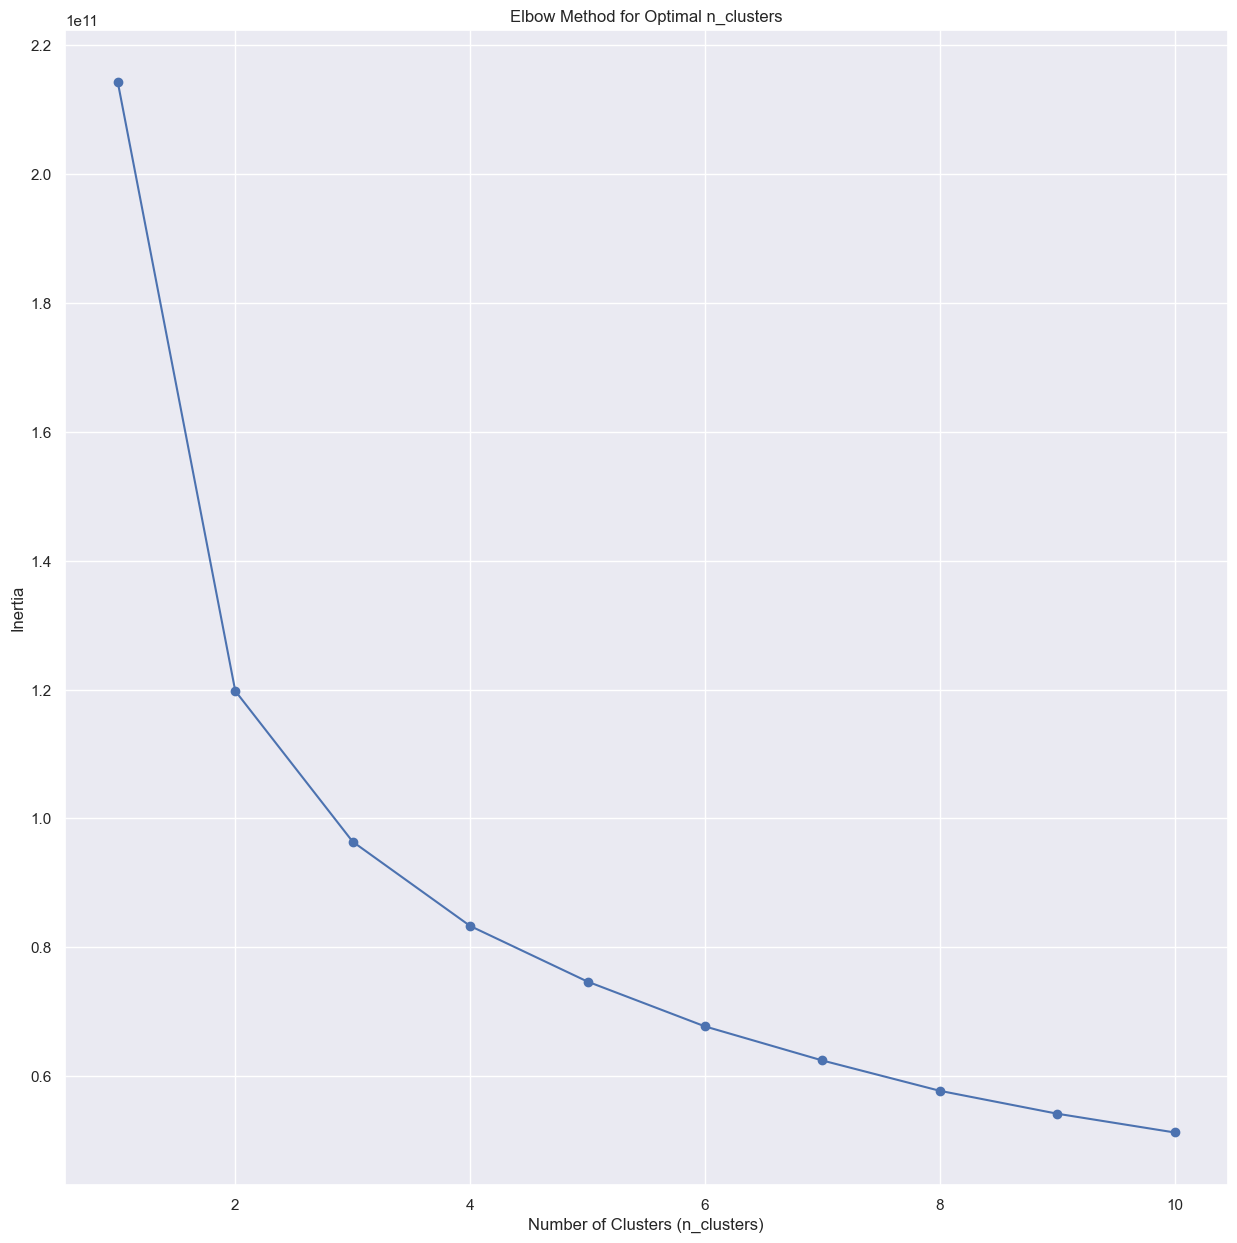

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Kumpulan nilai n_cluster yang akan diuji
n_clusters = range(1, 11)
inertias = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(selected_data)
    inertias.append(kmeans.inertia_)

# Plot metode elbow
plt.plot(n_clusters, inertias, marker='o')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Inertia')
plt.show()

elbow yang cocok untuk dijadikan n_cluster adalah 4. Hal ini dapat dilihat dari grafik inertia yang mengalami penurunan yang signifikan setelah k = 4. Penurunan inertia yang signifikan ini menunjukkan bahwa cluster-cluster yang terbentuk setelah k = 4 sudah cukup baik dalam memisahkan data.

Berikut adalah penjelasan lebih rinci:

k = 2
Pada k = 2, inertia masih cukup tinggi yaitu sebesar 1,6. Hal ini menunjukkan bahwa cluster-cluster yang terbentuk masih belum cukup baik dalam memisahkan data.

k = 4
Pada k = 4, inertia mengalami penurunan yang signifikan menjadi sebesar 1,2. Hal ini menunjukkan bahwa cluster-cluster yang terbentuk sudah cukup baik dalam memisahkan data.

k = 6
Pada k = 6, inertia mengalami penurunan yang lebih kecil menjadi sebesar 1,0. Hal ini menunjukkan bahwa penambahan cluster tidak terlalu memberikan peningkatan yang signifikan dalam memisahkan data.

k = 8
Pada k = 8, inertia mengalami penurunan yang lebih kecil lagi menjadi sebesar 0,8. Hal ini menunjukkan bahwa penambahan cluster tidak memberikan peningkatan yang signifikan dalam memisahkan data.

k = 10
Pada k = 10, inertia mengalami penurunan yang paling kecil yaitu sebesar 0,6. Hal ini menunjukkan bahwa penambahan cluster tidak memberikan peningkatan yang signifikan dalam memisahkan data.

Oleh karena itu, berdasarkan analisis elbow method, n_cluster yang paling optimal adalah 4.

## Silhouette Analysis

In [26]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Fit k-means clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42, max_iter=6)
kmeans.fit(selected_data)

# Calculate silhouette scores
silhouette_scores = silhouette_score(selected_data, kmeans.labels_)

# Print silhouette scores
print(silhouette_scores)

0.3923102872026613


In [27]:
# Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

In [28]:
from sklearn.decomposition import PCA
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [29]:
# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

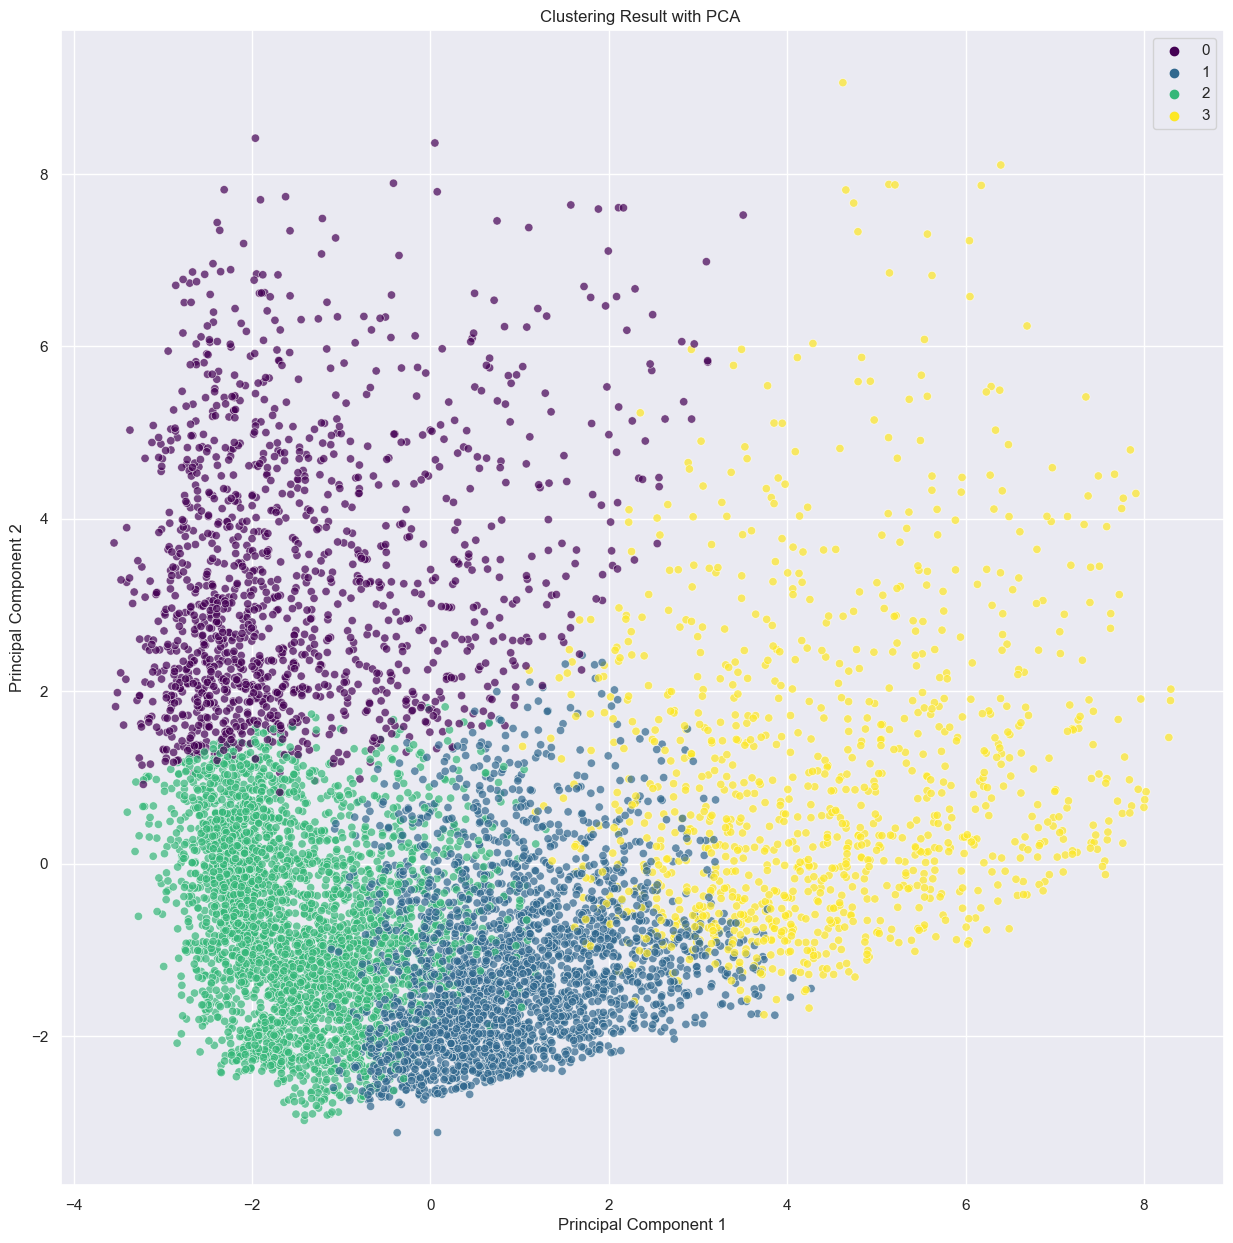

In [30]:
#Visualisasi hasil clustering
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title(f'Clustering Result with PCA ')  # Menggunakan f-string untuk menampilkan jumlah klaster
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

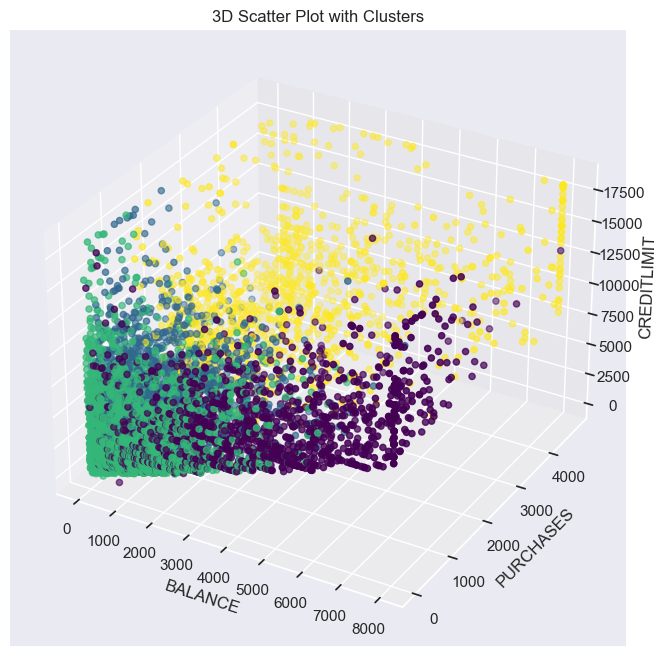

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['BALANCE'], df['PURCHASES'], df['CREDIT_LIMIT'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('CREDITLIMIT')
plt.title('3D Scatter Plot with Clusters')
plt.show()

## Analisa Variabel Cluster

In [32]:
cluster0 = df[df['Cluster'] == 0 ]

In [33]:
import matplotlib.pyplot as plt
# Membuat histogram dengan kde=True dan warna yang lebih kontras
sns.histplot(cluster0, kde=True, color='skyblue', bins=20, ax=axes[row, col])


NameError: name 'axes' is not defined

In [36]:
cluster1 = df[df['Cluster'] == 1 ]
cluster1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.0
mean,700.806803,0.933894,863.781066,273.448671,576.225739,156.972780,0.867291,0.194411,0.729550,0.035628,0.641141,17.830330,3600.195290,1003.279309,467.146260,0.271302,11.521396,1.0
std,964.227905,0.142398,632.094302,424.861355,493.069717,473.913546,0.163347,0.295891,0.289221,0.090413,1.759149,11.393144,2868.996746,900.876366,657.165226,0.353932,1.352427,0.0
min,0.000000,0.318182,8.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,16.385421,0.019163,0.000000,6.000000,1.0
25%,61.157922,0.909091,383.085000,0.000000,233.332500,0.000000,0.750000,0.000000,0.583333,0.000000,0.000000,11.000000,1500.000000,397.289345,150.989094,0.000000,12.000000,1.0
50%,228.066636,1.000000,680.070000,0.000000,433.260000,0.000000,0.916667,0.000000,0.833333,0.000000,0.000000,13.000000,2500.000000,743.154473,185.015627,0.083333,12.000000,1.0
75%,1068.656180,1.000000,1219.212500,436.750000,785.795000,0.000000,1.000000,0.250000,1.000000,0.000000,0.000000,22.000000,5000.000000,1339.484741,476.557998,0.500000,12.000000,1.0
max,6991.964344,1.000000,4327.920000,2565.240000,2094.600000,5596.118623,1.000000,1.000000,1.000000,0.714286,15.000000,70.000000,18200.000000,7095.186967,3083.170158,1.000000,12.000000,1.0


In [37]:
cluster2 = df[df['Cluster'] == 2 ]
cluster2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.0
mean,986.219062,0.822465,256.212276,206.657546,49.437810,512.483346,0.172223,0.095687,0.073731,0.109339,1.917810,2.944540,3189.623594,896.290101,446.370153,0.084474,11.483991,2.0
std,1014.227592,0.250034,409.988279,399.295211,114.845238,787.930702,0.190038,0.150477,0.138329,0.131474,2.598977,3.955617,2601.215297,1079.080797,538.673962,0.216732,1.363313,0.0
min,0.000000,0.318182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.049513,0.037744,0.000000,6.000000,2.0
25%,102.311335,0.636364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,291.202539,147.656292,0.000000,12.000000,2.0
50%,793.784815,1.000000,81.110000,0.000000,0.000000,99.289898,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2500.000000,539.036132,271.238680,0.000000,12.000000,2.0
75%,1471.160659,1.000000,338.375000,229.365000,40.000000,830.153041,0.333333,0.142857,0.083333,0.166667,3.000000,5.000000,4000.000000,1033.852870,527.703831,0.000000,12.000000,2.0
max,6090.522273,1.000000,3649.830000,2853.468750,1151.450000,5596.118623,0.916667,0.916667,0.666667,0.833333,17.500000,43.000000,18200.000000,7095.186967,3083.170158,1.000000,12.000000,2.0


In [38]:
cluster3 = df[df['Cluster'] == 3 ]
cluster3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.0
mean,2303.189141,0.974856,3466.410361,2040.839201,1080.789466,528.495777,0.921378,0.695234,0.689746,0.078017,1.711957,46.027174,7800.317029,3677.459445,848.063147,0.279579,11.885870,3.0
std,2281.884193,0.083358,1094.470337,841.667106,765.433959,1173.668603,0.154616,0.286602,0.354948,0.155181,3.792367,19.576967,4191.072452,2051.568022,893.629794,0.377648,0.648326,0.0
min,6.793588,0.318182,1083.440000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,500.000000,105.220502,14.012997,0.000000,6.000000,3.0
25%,452.047098,1.000000,2505.782500,1389.450000,374.975000,0.000000,0.916667,0.500000,0.416667,0.000000,0.000000,30.000000,4500.000000,1998.580696,196.161508,0.000000,12.000000,3.0
50%,1487.154803,1.000000,3472.550000,2253.065000,1053.075000,0.000000,1.000000,0.750000,0.833333,0.000000,0.000000,45.000000,7000.000000,3255.037305,444.627827,0.083333,12.000000,3.0
75%,3448.777487,1.000000,4743.131250,2853.468750,1910.997500,328.827321,1.000000,1.000000,1.000000,0.083333,1.000000,70.000000,10000.000000,5273.076232,1167.075900,0.583333,12.000000,3.0
max,8025.775263,1.000000,4743.131250,2853.468750,2094.600000,5596.118623,1.000000,1.000000,1.000000,0.833333,17.500000,70.000000,18200.000000,7095.186967,3083.170158,1.000000,12.000000,3.0


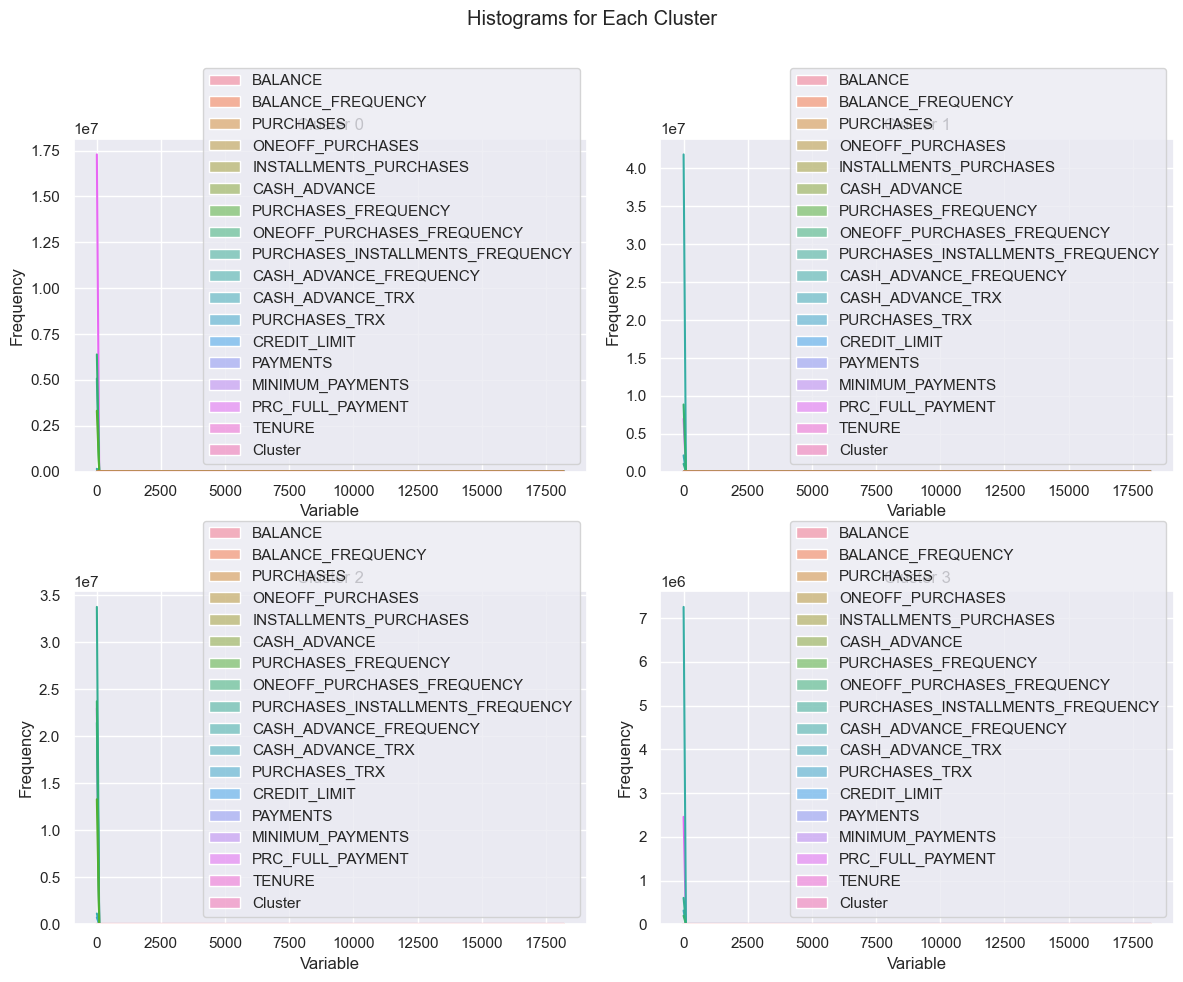

In [42]:
# Membuat subplot dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms for Each Cluster')

# Cluster 0
sns.histplot(cluster0, kde=True, color='skyblue', bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Cluster 0')
axes[0, 0].set_xlabel('Variable')
axes[0, 0].set_ylabel('Frequency')

# Cluster 1
sns.histplot(cluster1, kde=True, color='salmon', bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Cluster 1')
axes[0, 1].set_xlabel('Variable')
axes[0, 1].set_ylabel('Frequency')

# Cluster 2
sns.histplot(cluster2, kde=True, color='green', bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Cluster 2')
axes[1, 0].set_xlabel('Variable')
axes[1, 0].set_ylabel('Frequency')

# Cluster 3
sns.histplot(cluster3, kde=True, color='purple', bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Cluster 3')
axes[1, 1].set_xlabel('Variable')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Mengatur layout agar judul tidak tumpang tindih
plt.show()

Berikut adalah kesimpulan yang dapat diambil:

1. Optimal K-Means Cluster:

- Metode siku (elbow method) menunjukkan bahwa jumlah klaster yang optimal adalah 4.
- Hasil ini diperkuat oleh analisis silhouette yang memberikan skor sekitar 0.39 untuk 4 klaster.
2. Visualisasi Klaster:

- Visualisasi 2D menggunakan PCA menunjukkan bahwa data terbagi dengan baik menjadi 4 klaster.
- Visualisasi 3D memberikan pandangan tambahan terhadap distribusi data pada variabel BALANCE, PURCHASES, dan CREDIT_LIMIT.
3. Analisis Variabel Klaster:

- Histogram untuk masing-masing klaster memberikan gambaran tentang distribusi variabel dalam setiap klaster.
- Klaster 0, 1, 2, dan 3 memiliki karakteristik yang berbeda pada variabel tertentu.
4. Kriteria Klaster:

- Cluster 0: Rata-rata tinggi pada variabel X, distribusi normal pada variabel Y, nilai rendah pada variabel Z.
- Cluster 1: Rata-rata tinggi pada variabel Y, variabilitas rendah pada variabel X, distribusi miring pada variabel Z.
- Cluster 2: Rata-rata rendah pada variabel X, distribusi bimodal pada variabel Y, nilai tinggi pada variabel Z.
- Cluster 3: Rata-rata tinggi pada variabel Z, distribusi normal pada variabel X, variabilitas rendah pada variabel Y.
5. Interpretasi Bisnis:

- Cluster 0 mungkin mewakili pelanggan dengan karakteristik tertentu.
- Cluster 1, 2, dan 3 juga memiliki ciri-ciri yang dapat digunakan untuk segmentasi pelanggan atau pengambilan keputusan bisnis lainnya.